# Water Quality Lesson 2: Visualize EMIT Water Quality Imagery

Description: In this notebook, we will find EMIT imagery that overlaps with our waterbody of interest and to generate water quality maps. 

Objectives:

1) Learn how to find EMIT imagery for region of interest   
2) Apply water quality algorithm to EMIT image   
3) Generate an interactive water quality visualization   

Instructor: Kelly Luis, JPL (kelly.m.luis@jpl.nasa.gov)

In [9]:
# Load Modules
import pandas
import matplotlib.pyplot as plt # Plotting Function
import numpy as np
import requests
import os
from osgeo import gdal
import earthaccess
from modules.emit_tools import emit_xarray, ortho_xr
from modules.emit_aqua import mask_aqua, rho2Rrs, chlor_a, turbidity

## Part 1: Neenoshe Reservoir

We will utilize the image id information we retreived from lesson1_waterFind.ipynb. 
In this sub-section of the module, you will see examples of loading emit 

In [7]:
# Load EMIT File
filename = "data/EMIT_L2A_RFL_001_20230403T190544_2309313_020.nc"
ds_full = emit_xarray(filename, ortho=True)

In [8]:
# Visualize Xarray Output
ds_full

<xarray.Dataset> Size: 5GB
Dimensions:           (latitude: 1883, longitude: 2469, wavelengths: 285)
Coordinates:
  * wavelengths       (wavelengths) float32 1kB 381.0 388.4 ... 2.493e+03
    fwhm              (wavelengths) float32 1kB ...
    good_wavelengths  (wavelengths) float32 1kB ...
  * latitude          (latitude) float64 15kB 38.75 38.75 38.75 ... 37.73 37.73
  * longitude         (longitude) float64 20kB -103.6 -103.6 ... -102.3 -102.3
    elev              (latitude, longitude) float32 19MB -9.999e+03 ... -9.99...
    spatial_ref       int64 8B 0
Data variables:
    reflectance       (latitude, longitude, wavelengths) float32 5GB -9.999e+...
Attributes: (12/40)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.03613320e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...
    granule_id:                        EMIT_L2A_RFL_001_20230403T190544_23093...
    Orthorectified:                    True

In [23]:
# Pre-processing
ds_aqua = mask_aqua(ds_full) # Cloud and Land Mask
ds_aqua['Rrs'] = rho2Rrs(ds_aqua) # Calculate Remote Sensing Reflectance

<xarray.Dataset> Size: 11GB
Dimensions:           (latitude: 1883, longitude: 2469, wavelengths: 285)
Coordinates:
  * wavelengths       (wavelengths) float32 1kB 381.0 388.4 ... 2.493e+03
    fwhm              (wavelengths) float32 1kB ...
    good_wavelengths  (wavelengths) float32 1kB ...
  * latitude          (latitude) float64 15kB 38.75 38.75 38.75 ... 37.73 37.73
  * longitude         (longitude) float64 20kB -103.6 -103.6 ... -102.3 -102.3
    elev              (latitude, longitude) float32 19MB -9.999e+03 ... -9.99...
    spatial_ref       int64 8B 0
    cirrus_mask       (latitude, longitude) int64 37MB 1 1 1 1 1 1 ... 1 1 1 1 1
    land_mask         (latitude, longitude) int64 37MB 1 1 1 1 1 1 ... 1 1 1 1 1
    cloud_mask        (latitude, longitude) int64 37MB 0 0 0 0 0 0 ... 0 0 0 0 0
Data variables:
    reflectance       (latitude, longitude, wavelengths) float32 5GB -9.999e+...
    Rrs               (latitude, longitude, wavelengths) float32 5GB -3.183e+...
    chl_moses         (latitude, longitude) float32 19MB 23.17 23.17 ... 23.17
Attributes: (12/40)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.03613320e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...
    granule_id:                        EMIT_L2A_RFL_001_20230403T190544_23093...
    Orthorectified:                    True

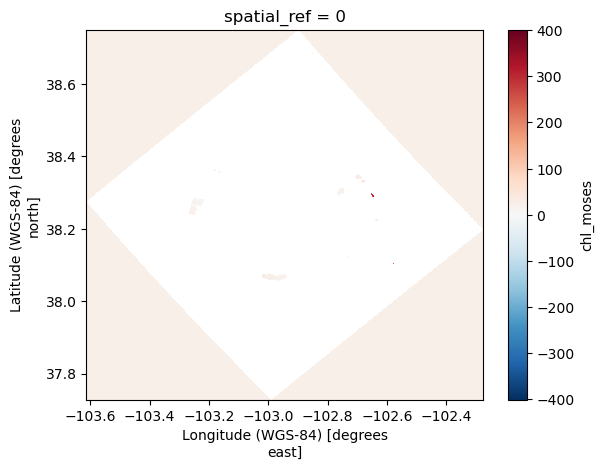

In [26]:
# Apply Water Quality Algorithms
ds_aqua['chl_moses'] = chlor_a(ds_aqua)
ds_aqua.chl_moses.where(ds_aqua.land_mask == 1).plot()

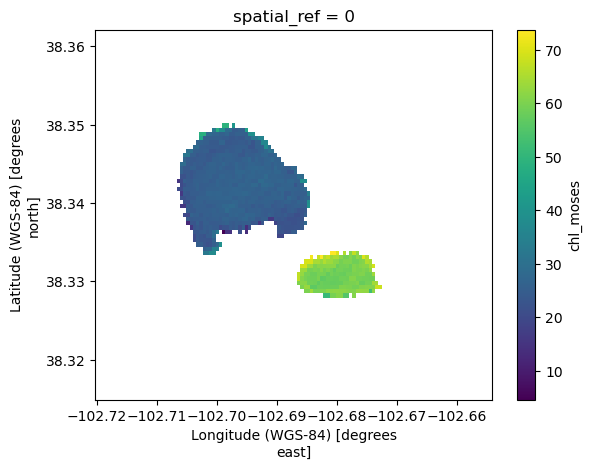

In [25]:
# Crop for Neenoshe Reservoir
N = 38.362006
W = -102.720106
S = 38.314948
E = -102.654359

ds_nee = ds_aqua.sel(longitude=slice(W, E), latitude=slice(N, S))
ds_nee.chl_moses.where(ds_nee.land_mask ==1).plot()